 RFECV (Recursive Feature Elimination with Cross Validation)

⸻

✅ How it works

Uses ML model to:
	1.	Train with all features.
	2.	Remove weakest feature.
	3.	Retrain model.
	4.	Repeat.
	5.	Use cross-validation to find best subset.
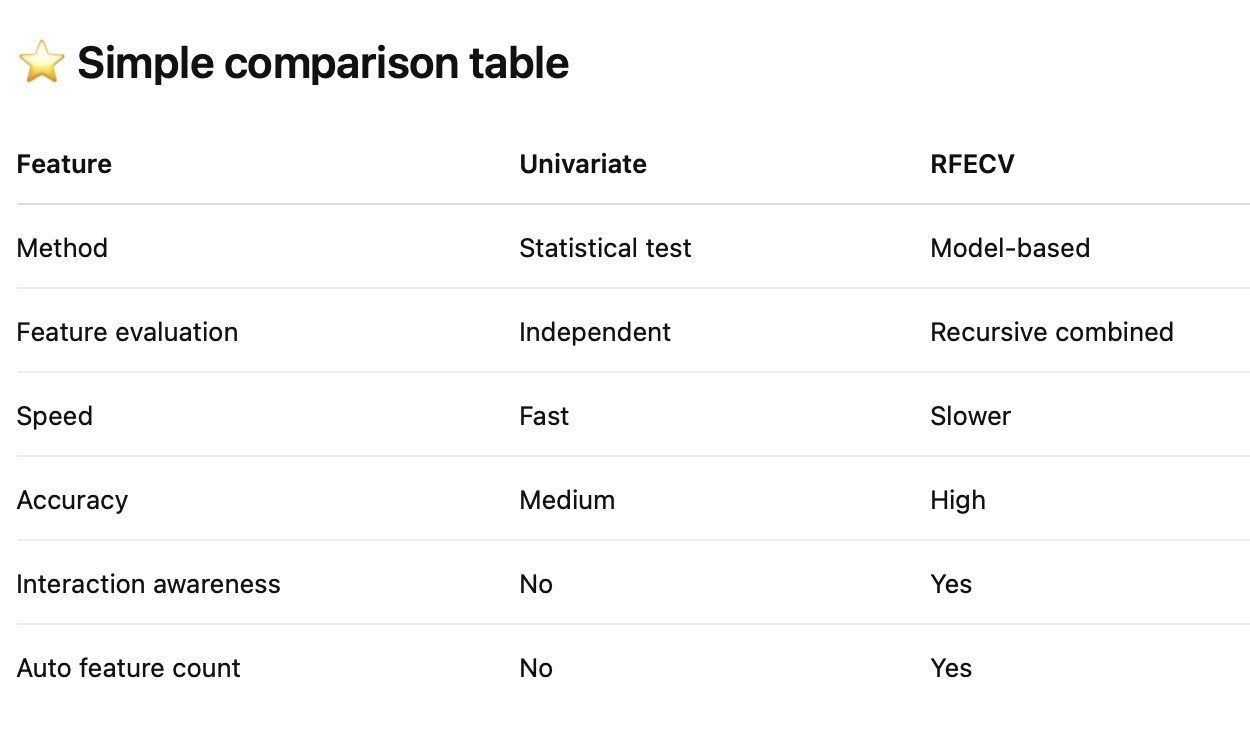

⭐ When to use each

⸻

✅ Use Univariate when:
	•	Large dataset.
	•	Need quick filtering.
	•	Initial preprocessing step.

⸻

✅ Use RFECV when:
	•	Want best feature subset.
	•	Final model tuning.
	•	Production-ready feature selection.


In [1]:
import pandas as pd
my_df = pd.read_csv("feature_selection_sample_data.csv")

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

In [2]:
X = my_df.drop(["output"], axis = 1)
y = my_df["output"]

In [3]:
regressor = LinearRegression()
feature_selector = RFECV(regressor)

In [4]:
fit = feature_selector.fit(X,y)


⭐ 1️⃣ feature_selector.n_features_

This is an attribute created after fitting RFECV.

It tells:

👉 How many features were selected as optimal.

In [5]:
optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

Optimal number of features: 2


🔹 1️⃣ feature_selector.get_support()

This returns:

👉 Boolean mask (True/False array).

In [6]:
X_new = X.loc[:, feature_selector.get_support()]

In [7]:
import matplotlib.pyplot as plt

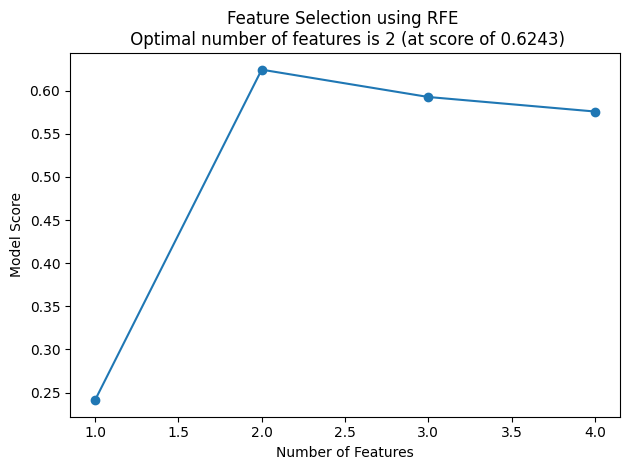

In [8]:
plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout() #Prevents label overlap.
plt.show()